# Load libraries

In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random

In [2]:
from collections.abc import Iterable

def flatten(l):
    for el in l:
        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

In [3]:
# Features list 
# 0 : oenv
# 1 : tempo
# 2 : pulse
# 3 : mfcc
# 4 : centroid
# 5 : rolloff
# 6 : flatness
# 7 : spec_bw
# 8 : contrast
# 9 : pitch
# 

In [4]:
data_pwd = '../data/'
os.chdir(data_pwd)
print('Working directory:', os.getcwd())
# load extracted features
data_fn = 'algorave10-feature-extraction.pkl'
with open(data_fn, 'rb') as handle:
    d = pickle.load(handle)
keys = sorted(list(d.keys()))
#

data_pwd = '../data/'
os.chdir(data_pwd)
print('Working directory:', os.getcwd())
# load list of performances
with open('performances.pkl', 'rb') as handle:
    performances = pickle.load(handle)
# load list with outliers
with open('outliers_idx.pkl', 'rb') as handle:
    outliers_idx = pickle.load(handle)
# REVERSED KEYS
keys = list(reversed(sorted(list(d.keys()))))

# get spectral centroid data
oenv_data = [] # idx: 0
pulse_data = [] # idx: 2
mfcc_data = [] # idx: 3
centroid_data = [] # idx: 4
rolloff_data = [] # idx: 5
flatness_data = [] # idx: 6
specbw_data = [] # idx: 7
contrast_data = [] # idx: 8
pitch_data = [] # idx: 9

for i in range(0, len(keys)):
    if i not in outliers_idx:
        key = keys[i]
        # print(key)
        oenv = d[key][0][1].reshape(-1)
        oenv_data.append(oenv)
        pulse = d[key][2][1].reshape(-1)
        pulse_data.append(pulse)
        mfcc = d[key][3][1]
        mfcc_data.append(mfcc)
        centroid = d[key][4][1].reshape(-1)
        centroid_data.append(centroid)
        rolloff = d[key][5][1].reshape(-1)
        rolloff_data.append(rolloff)
        flatness = d[key][6][1].reshape(-1)
        flatness_data.append(flatness)
        specbw = d[key][7][1].reshape(-1)
        specbw_data.append(specbw)
        contrast = d[key][8][1]
        contrast_data.append(contrast)
        pitch = d[key][9][1][0]
        pitch_data.append(pitch)

Working directory: /home/jovyan/work/data
Working directory: /home/jovyan/work/data


# Global descriptors
- Mean and std for each performance

In [5]:
len(performances), len(outliers_idx), type(performances), type(d), len(list(d.keys())) # list(d.keys()), 

(133, 12, list, dict, 133)

In [6]:
performances[0]

('pulu',
 '2022-03-20 20:50',
 'https://archive.org/details/algorave',
 'https://archive.org/download/algorave-10-pulu/be28cb5a-06a0-4658-a467-125c8b7ed3fb-20-Mar-22-20-50-19.mp4',
 'Helsinki',
 'UFORAVE!QUICKLY :: from neural network poison swamp to game boy(girl) supercollider supercatastrophe')

In [7]:
list_d = list(d.keys())
[x for x in enumerate(list_d) if x == ''], list_d[:5], len(list_d)

([],
 ['20-Mar-22-05-20',
  '19-Mar-22-22-10',
  '20-Mar-22-05-00',
  '20-Mar-22-17-40',
  '20-Mar-22-04-30'],
 133)

In [8]:
keys = sorted(list(d.keys()))
len(keys), keys[:5]

(133,
 ['19-Mar-22-21-00',
  '19-Mar-22-21-10',
  '19-Mar-22-21-20',
  '19-Mar-22-21-30',
  '19-Mar-22-21-40'])

## Extract global descriptors per segment

In [9]:
feature_vals = []

for i in range(0, len(oenv_data)):
#     print('i =', i)
    vals = [
        # mean
        np.mean(oenv_data[i]),
        np.mean(centroid_data[i]),
        np.mean(rolloff_data[i]),
        np.nanmean(pitch_data[i]),
        # std
#         np.std(oenv_data[i]),
#         np.std(centroid_data[i]),
#         np.std(rolloff_data[i]),
#         np.nanstd(pitch_data[i]),        
    ]
    feature_vals.append(list(flatten(vals))) 

In [10]:
np.shape(feature_vals)

(121, 4)

# Assign features to a variable

In [11]:
X = np.array(feature_vals)
X.shape

(121, 4)

# Plot histograms of features

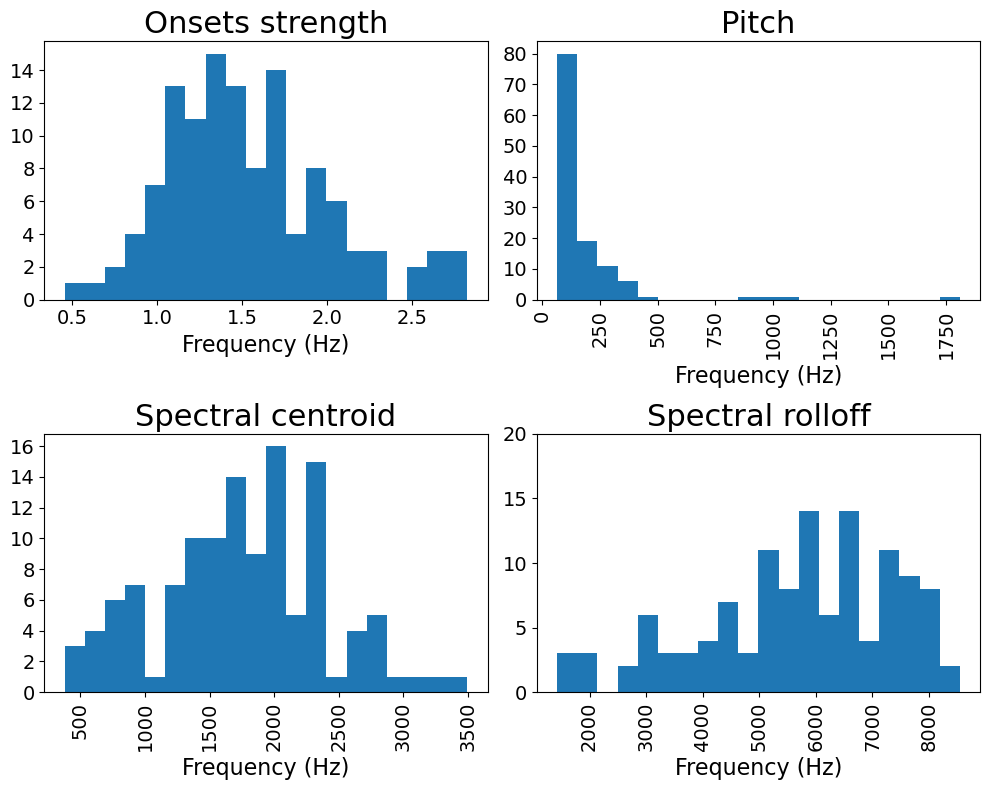

In [12]:
tfont = 22
bsize = 20
plt.figure(figsize=(10,8))
# 1
plt.subplot(221)
plt.hist(X[:, 0], bins=bsize);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.title('Onsets strength', fontsize=tfont)
# 2
plt.subplot(222)
plt.hist(X[:, 3], bins=bsize);
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.title('Pitch', fontsize=tfont)
# 3
plt.subplot(223)
plt.hist(X[:, 1], bins=bsize);
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.title('Spectral centroid', fontsize=tfont)
# 4
plt.subplot(224)
plt.hist(X[:, 2], bins=bsize);
plt.xticks(fontsize=14, rotation=90)
plt.yticks([0, 5, 10, 15, 20], fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.title('Spectral rolloff', fontsize=tfont)

plt.tight_layout()

# Assign performances and systems

In [13]:
len(keys), len(performances)

(133, 133)

In [14]:
languages = []
j = 0
for i in range(0, len(performances)):
    if i not in outliers_idx:
        info = performances[i][5]
        print(i, info)
        languages.append([i, j, info])
        j = j + 1

0 UFORAVE!QUICKLY :: from neural network poison swamp to game boy(girl) supercollider supercatastrophe
1 Wonky beats and broken synths
2 Some patterns
3 lofi algorithmic sequencer and a load of synths followed by some crashing SuperCollider code :)
4 Beats de la montaña
5 TidalCycles + SuperCollider
7 foxdot + orca
8 Everyone's friend Calum Gunn off the top rope, back from early parenthood to play Music Online
9 symbiotic beats / machine listening (SC3) control of live coding (Tidal) with some help from Python
10 AlgaLib/eration
11 SuperCollider / Recursion / Choatic / Semi-Repititions
12 algo-ukg
13 Some kind of krautrock with TC
14 Fun_with_swing
15 distributed live coding performance using https://c0l1v3.bgo.la/
16 Don't let the music distract you from the emojis
17 event related potential / clickwork / tidalcycles with fx
18 undefined
19 Improvised from scratch Techno infused with Berliner rave spirit made with TidalCycles and SuperCollider, visuals in Hydra.
20 trying out some thi

# Retrieved and analysis indices
- Get video links to the Internet Archive

In [15]:
for elem in languages:
    print(elem)
    print(performances[elem[0]][0], '--', performances[elem[0]][3])
    print('========================')

[0, 0, 'UFORAVE!QUICKLY :: from neural network poison swamp to game boy(girl) supercollider supercatastrophe']
pulu -- https://archive.org/download/algorave-10-pulu/be28cb5a-06a0-4658-a467-125c8b7ed3fb-20-Mar-22-20-50-19.mp4
[1, 1, 'Wonky beats and broken synths']
Shelly knotts -- https://archive.org/download/algorave-10-shelly-knotts/0a3d99f1-d093-474c-8e37-9c9e16e87c58-20-Mar-22-20-40-21.mp4
[2, 2, 'Some patterns']
Yaxu -- https://archive.org/download/algorave-10-yaxu/cf0cc75b-bb1e-46f9-85bf-fe53b28ae49c-20-Mar-22-20-30-13.mp4
[3, 3, 'lofi algorithmic sequencer and a load of synths followed by some crashing SuperCollider code :)']
YEE-KING -- https://archive.org/download/algorave-10-yee-king/f0aef102-5c5f-4207-a6ac-588080e10430-20-Mar-22-20-20-14.mp4
[4, 4, 'Beats de la montaña']
Rafrobeat -- https://ia601406.us.archive.org/18/items/algorave-10-rafrobeat/84377818-169a-48e3-b927-8666966bc1d6-20-Mar-22-20-10-20.mp4
[5, 5, 'TidalCycles + SuperCollider']
Chris Lambie-Hanson -- https://ar

# Annotations of performance systems

In [16]:
annotations = [
[0, 0, 'UFORAVE!QUICKLY :: from neural network poison swamp to game boy(girl) supercollider supercatastrophe', ['SC3', 'Tidal']],
[1, 1, 'Wonky beats and broken synths', ['SC3']],
[2, 2, 'Some patterns', ['Tidal']],
[3, 3, 'lofi algorithmic sequencer and a load of synths followed by some crashing SuperCollider code :)', ['SC3']],
[4, 4, 'Beats de la montaña', ['Tidal']],
[5, 5, 'TidalCycles + SuperCollider', ['SC3', 'Tidal']],
[7, 6, 'foxdot + orca', ['Foxdot', 'Orca']],
[8, 7, "Everyone's friend Calum Gunn off the top rope, back from early parenthood to play Music Online", ['Tidal', 'MAX/MSP']],
[9, 8, 'symbiotic beats / machine listening (SC3) control of live coding (Tidal) with some help from Python', ['SC3', 'Tidal']],
[10, 9, 'AlgaLib/eration', ['SC3']],
[11, 10, 'SuperCollider / Recursion / Choatic / Semi-Repititions', ['SC3']],
[12, 11, 'algo-ukg', ['Tidal']],
[13, 12, 'Some kind of krautrock with TC', ['Tidal']],
[14, 13, 'Fun_with_swing', ['Tidal']],
[15, 14, 'distributed live coding performance using https://c0l1v3.bgo.la/', ['c0l1v3']],
[16, 15, "Don't let the music distract you from the emojis", ['Tidal']],
[17, 16, 'event related potential / clickwork / tidalcycles with fx', ['Tidal']],
[18, 17, 'undefined', ['Unknown']],
[19, 18, 'Improvised from scratch Techno infused with Berliner rave spirit made with TidalCycles and SuperCollider, visuals in Hydra.', ['Tidal', 'SC3']],
[20, 19, 'trying out some things with tidal', ['Tidal']],
[21, 20, 'beats and sounds with SuperCollider', ['SC3']],
[22, 21, 'Khipumancer (+ the Neokhipukamayoq Manifesto)', ['Unknown']],
[23, 22, 'TWN Botcore', ['Tidal']],
[24, 23, 'Subaquatic live-coding and analog visuals', ['Tidal']],
[25, 24, 'using soundb0ard // https://github.com/sideb0ard/SoundB0ard', ['SoundB0ard']],
[26, 25, '(a)live computing dance', ['Unknown']],
[27, 26, 'cinging (coding + singing)', ['Sonic Pi']],
[28, 27, 'a DIY guitar + synths + flock', ['Tidal']],
[29, 28, 'etheric birthday loop meditations in tidal + hydra', ['Tidal']],
[30, 29, "'PyTouch'", ['Unknown']],
[32, 30, 'live and coding', ['SC3']],
[33, 31, 'live drawing + hydra + maybe freesound or maybe not', ['JS']],
[34, 32, 'i love sonicPI', ['Sonic Pi']],
[35, 33, 'BBScar (FoxDot)', ['FoxDot']],
[36, 34, 'Tidalcycles / TouchDesigner and openFrameworks visials', ['Tidal']],
[37, 35, 'Livecoding with TidalCycles & TouchDesigner.', ['Tidal']],
[38, 36, 'My first Livecoding performance using Strudel REPL, which runs new tidal js implementation: https://strudel.tidalcycles.org/', ['Tidal']],
[39, 37, 'EverySongIOwn making music using neural networks and entire teenage music collection. https://soundcloud.com/skatterbrainz/everysongiown-v3', ['Tidal']],
[41, 38, 'tidalcycles_touchdesigner', ['Tidal']],
[42, 39, 'Indian Dance Music, Irregular Dance Music, or Irrelevant Dance Music', ['Tidal']],
[43, 40, 'TidalCycles + Drum Machines + Hardware Synths + Hydra', ['Tidal']],
[44, 41, 'TidalCycles', ['Tidal']],
[45, 42, "I'm bad at writing descriptions", ['Tidal']],
[46, 43, '#algoclassical #algolectro #codeDJ #tidalcycles', ['Tidal']],
[47, 44, 'Performance with SonicPi and MIDI controller', ['SonicPi']],
[48, 45, 'SonicPi Live coding Acid Techno', ['SonicPi']],
[49, 46, 'SonicPi + orca', ['Sonic Pi', 'Orca']],
[50, 47, 'Orca beats + Veda visuals : bentnoise on Insta', ['Orca']],
[51, 48, 'incoherent electronic garbage', ['Unknown']],
[52, 49, 'microtuned modal music with ORCA and folderkit', ['Orca']],
[53, 50, 'Bzz bzzs, blip blops, and other awful sounds with TidalCycles and SuperCollider', ['SC3', 'Tidal']],
[54, 51, 'supercollider and kemence', ['SC3']],
[55, 52, 'Foxdot', ['Foxdot']],
[56, 53, 'Some strange loops', ['Tidal']],
[57, 54, 'newbie making breakbeaty things on sonic pi', ['Sonic Pi']],
[58, 55, 'Lisp powered ChucK : Cisp', ['Chuck', 'Lisp']],
[59, 56, 'Playing Cascade, a custom made software that turns graphic rules into sound', ['Cascade']],
[60, 57, 'Csound and haskell + maybe some Elektron magic?', ['CSound']],
[61, 58, 'vvvv + Hydra with some kind of accompanying audio', ['Unknown']],
[62, 59, 'tripped-out melodic tidal beats', ['Tidal']],
[63, 60, 'Sonic Pi exploration :)', ['Sonic Pi']],
[64, 61, 'first stream ever = better-late-than-never foxdot bleep-blorp vibes', ['Foxdot']],
[65, 62, 'Tidal/Punctual 10th birthday party sounds', ['Tidal']],
[66, 63, 'Supercollider synthdefs sequenced using TidalCycles, with web/JavaScript visuals.', ['SC3']],
[68, 64, 'Low self-opinion livecoding rumble', ['Tidal']],
[69, 65, 'Untse-untse + spanish scale', ['Tidal']],
[70, 66, 'hard coding', ['Tidal', 'SC3']],
[71, 67, 'Coffee break w/sonic pi.', ['Sonic Pi']],
[73, 68, 'Foxdot / battle against a non-AI random generative server', ['Foxdot']],
[74, 69, 'Godti/Sema', ['Sema', 'Godti']],
[75, 70, 'Ableton, Self-LaunchClips + Max4Live Basicness', ['Ableton', 'MAX/MSP']],
[76, 71, 'Unpredictable MIDI panic. Or possibly ambient generative analog synth. Who knows?', ['MAX/MSP']],
[77, 72, 'Live Coding w/ Sonic Pi', ['Sonic Pi']],
[78, 73, 'Touched by Brazil (Orca beats)', ['Orca']],
[79, 74, 'Livecoded Ragas / Sonic Pi', ['Sonic Pi']],
[80, 75, 'Live code, Real time Color trails', ['Unknown']],
[81, 76, 'True Tales : Tales of Ten : SonicPi/LivecodeLab/Poetry/Others', ['Sonic Pi']],
[82, 77, 'Gabber and Breakcore with ORCA', ['Orca']],
[83, 78, "Algoravin' Broken Techno with Supercollider", ['SC3']],
[85, 79, 'pilot orca', ['Orca']],
[87, 80, 'Something strange and possibly hearing loss inducing using hardware synths and TidalCycles', ['Tidal']],
[88, 81, 'TidalCycles', ['Tidal']],
[89, 82, 'hydra.js / Sonic pi / Orca / Dirtywave M8', ['Sonic Pi', 'Orca']],
[90, 83, 'some suff ive been working on', ['Tidal']],
[92, 84, 'Noise // FoxDot // Synths // Hydra', ['Foxdot']],
[93, 85, 'DJ with YouTube with Live Coding. First Try Experiment New Tools', ['Unknown', 'Youtube']],
[95, 86, 'tidal cycles + hydra + max/msp', ['Tidal', 'MAX/MSP']],
[96, 87, 'Sonic Pi, Petal', ['Sonic Pi']],
[97, 88, 'Tidalcycles', ['Tidal']],
[98, 89, 'Tidalcycles & guitar', ['Tidal']],
[99, 90, 'Tidal', ['Tidal']],
[100, 91, 'TidalCycles & Synths', ['Tidal']],
[101, 92, 'cyberwave x combosoft', ['Tidal', 'Orca']],
[102, 93, 'Tidalcycles', ['Tidal']],
[103, 94, 'TidalCycles + Modular Synth + TouchDesigner', ['Tidal']],
[104, 95, 'Solo Bass Sampled into TidalCycles', ['Tidal']],
[105, 96, 'Algorithmic dance music with TidalCycles', ['Tidal']],
[106, 97, 'Improvisation (Tidal + Max)', ['Tidal', 'MAX/MSP']],
[107, 98, 'Peruvian rockstar trying to be COOL (TidalCycles)', ['Tidal']],
[109, 99, 'TidalCycles/Hydra', ['Tidal']],
[110, 100, 'Hydra+FoxDot+More stuff', ['Foxdot']],
[111, 101, 'Electronic Music, Techno, IDM with Tidal Cycles controlling Analog, Digital Synths and Modular', ['Tidal']],
[113, 102, 'orca / smol hardware synths', ['Orca']],
[114, 103, 'nTexto > clases + patrones + sonidos con SC > Hydra', ['SC3']],
[115, 104, 'Not sure', ['Unknown']],
[116, 105, 'An open jam for anyone to come and join', ['Estuary']],
[117, 106, 'Foxdot', ['Foxdot']],
[118, 107, 'Diffracted-Cut-Up-Power-Glitch', ['Tidal']],
[119, 108, 'noise, drone, pulses, SuperCollider', ['SC3']],
[121, 109, 'Live coding ensemble using Hydra / Orca / hybrid modular synths', ['Orca']],
[122, 110, 'minimal noise', ['SC3']],
[123, 111, 'lo-fi', ['SC3']],
[124, 112, 'The Great Collapsing Hrung Disaster', ['Tidal', 'SC3']],
[125, 113, 'superCollider', ['SC3']],
[126, 114, 'three girls from cyberspace, wearing space helmets, probably', ['Unknown']],
[127, 115, 'procedural arps & beats', ['Unknown']],
[128, 116, 'Tidal strikes again!', ['Tidal']],
[129, 117, 'Live coding and live looping with Sonic Pi', ['Sonic Pi']],
[130, 118, 'Perform with Glicol: A graph-oriented live coding language written in Rust', ['Glicol']],
[131, 119, 'Spring cleaning with tidal cycles', ['Tidal']],
[132, 120, '????', ['Tidal']]
]

In [17]:
len(annotations)

121

In [18]:
sc3 = 0
tidal = 0
sonic = 0
foxdot = 0
orca = 0
maxmsp = 0
unknown = 0
all_lang_codes = []
for elem in annotations:
#     print(elem[-1][0])
    tmp =  elem[-1][0]
    if tmp == 'SC3':
        sc3 = sc3 + 1
        code = 'sc3'
    elif tmp == 'Tidal':
        tidal = tidal + 1
        code = 'tidal'
    elif (tmp == 'Sonic Pi') or (tmp == 'SonicPi'):
        sonic = sonic + 1
        code = 'sonic'
    elif (tmp == 'Foxdot') or (tmp == 'FoxDot'):
        foxdot = foxdot + 1
        code = 'foxdot'
    elif tmp == 'Orca':
        orca = orca + 1
        code = 'orca'
    elif tmp == 'MAX/MSP':
        maxmsp = maxmsp + 1
        code = 'other'
    elif tmp == 'Unknown':
        unknown = unknown + 1
        code = 'unknown'
    else:
        print(tmp)
        code = 'other'        
    all_lang_codes.append(code)

c0l1v3
SoundB0ard
JS
Chuck
Cascade
CSound
Sema
Ableton
Estuary
Glicol


In [19]:
sc3, tidal, sonic, foxdot, orca, maxmsp, unknown

(18, 52, 14, 8, 7, 1, 11)

In [20]:
sc3 + tidal + sonic + foxdot + orca + maxmsp + unknown

111

# Language codes for scatterplot

In [21]:
lang_codes = {'sc3': 1, 'tidal': 2, 'sonic': 3, 'foxdot': 4, 'orca': 5, 'unknown': 6, 'other': 7}

In [22]:
lang_codes, len(lang_codes)

({'sc3': 1,
  'tidal': 2,
  'sonic': 3,
  'foxdot': 4,
  'orca': 5,
  'unknown': 6,
  'other': 7},
 7)

In [23]:
lang_codes_idx = []
for elem in all_lang_codes:
#     print(lang_codes[elem])
    lang_codes_idx.append(lang_codes[elem]-1)

In [24]:
lang_codes_list = ['tidal', 'sc3', 'sonic', 'foxdot', 'orca', 'other', 'unknown']
print('len(lang_codes_list):', len(lang_codes_list))
code_idx = np.array(lang_codes_idx) # index per language
code_idx

len(lang_codes_list): 7


array([0, 0, 1, 0, 1, 0, 3, 1, 0, 0, 0, 1, 1, 1, 6, 1, 1, 5, 1, 1, 0, 5,
       1, 1, 6, 5, 2, 1, 1, 5, 0, 6, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 4, 5, 4, 0, 0, 3, 1, 2, 6, 6, 6, 5, 1, 2, 3, 1, 0, 1, 1,
       1, 2, 3, 6, 6, 6, 2, 4, 2, 5, 2, 4, 0, 4, 1, 1, 2, 1, 3, 5, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 0, 5, 6, 3, 1, 0, 4,
       0, 0, 1, 0, 5, 5, 1, 2, 6, 1, 1])

In [25]:
sc3_data = X[code_idx == 0, :]
tidal_data = X[code_idx == 1, :]
sonic_data = X[code_idx == 2, :]
foxdot_data = X[code_idx == 3, :]
orca_data = X[code_idx == 4, :]
other_data = X[code_idx == 5, :]
unknown_data = X[code_idx == 6, :]

# Examine feature correlations
- Below is shown the dependency of Spectral Rolloff to Spectral Centroid

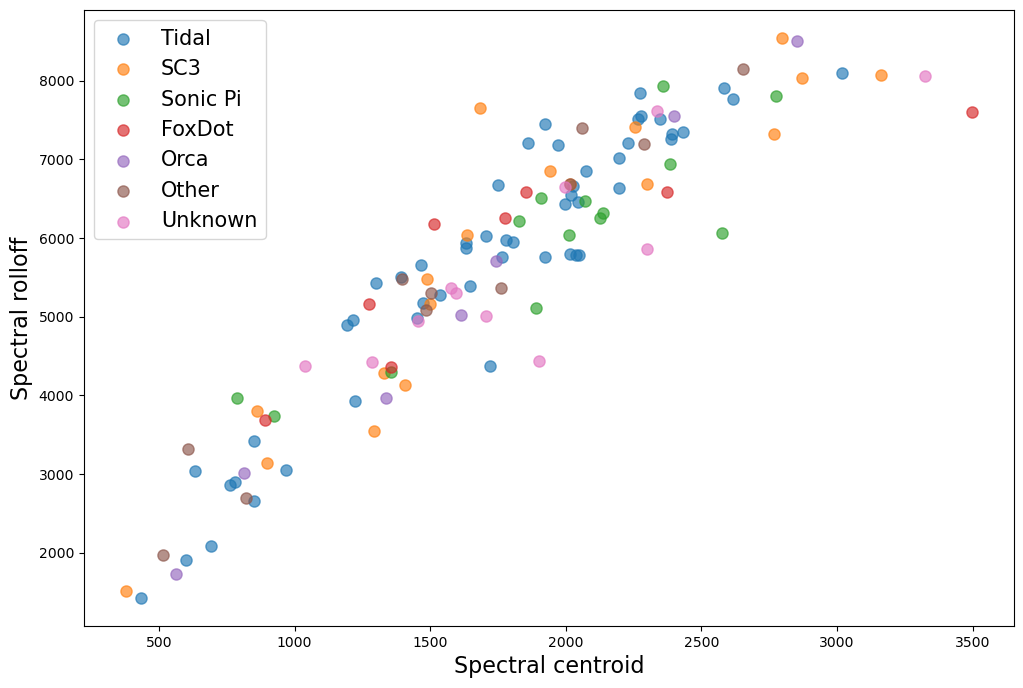

In [26]:
#   0: oenv_data
#   1: centroid_data
#   2: rolloff_data
#   3: pitch_data
# X: centroid, Y: rolloff
idx_1 = 1
idx_2 = 2
ms = 65
plt.figure(figsize=(12,8))
color_map = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
plt.scatter(tidal_data[:, idx_1], tidal_data[:, idx_2], c=color_map[0], s=ms, alpha=0.65)
plt.scatter(sc3_data[:, idx_1], sc3_data[:, idx_2], c=color_map[1], s=ms, alpha=0.65)
plt.scatter(sonic_data[:, idx_1], sonic_data[:, idx_2], c=color_map[2], s=ms, alpha=0.65)
plt.scatter(foxdot_data[:, idx_1], foxdot_data[:, idx_2], c=color_map[3], s=ms, alpha=0.65)
plt.scatter(orca_data[:, idx_1], orca_data[:, idx_2], c=color_map[4], s=ms, alpha=0.65)
plt.scatter(other_data[:, idx_1], other_data[:, idx_2], c=color_map[5], s=ms, alpha=0.65)
plt.scatter(unknown_data[:, idx_1], unknown_data[:, idx_2], c=color_map[6], s=ms, alpha=0.65)
plt.xlabel('Spectral centroid', fontsize=16)
plt.ylabel('Spectral rolloff', fontsize=16)
plt.legend(['Tidal', 'SC3', 'Sonic Pi', 'FoxDot', 'Orca', 'Other', 'Unknown'], fontsize=15)

# Compare two live sets

In [27]:
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from os import listdir
from os.path import isfile, join
import os
import pickle
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import ticker


In [28]:
def rosette_seg(x, N):
    segment_len = np.array_split(x, N)
    segment_div = []
    for elem in segment_len:
        segment_div.append(np.mean(elem))
    return np.array(segment_div)


# COLORBAR
def colored_bar(left, height, z=None, width=0.8, bottom=0, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    width = itertools.cycle(np.atleast_1d(width))
    bottom = itertools.cycle(np.atleast_1d(bottom))
    rects = []
    for x, y, h, w in zip(left, bottom, height, width):
        rects.append(Rectangle((x, y), w, h))
    coll = PatchCollection(rects, array=z, **kwargs)
    ax.add_collection(coll)
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(2 * np.pi, decimals=1))
    #     ax.autoscale()
    ax.set_rmax(np.max(radii))
    return coll

In [29]:
rev_performances = list(reversed(performances))

In [30]:
idx = 132
rev_performances[idx], keys[idx]  # sanity check

(('pulu',
  '2022-03-20 20:50',
  'https://archive.org/details/algorave',
  'https://archive.org/download/algorave-10-pulu/be28cb5a-06a0-4658-a467-125c8b7ed3fb-20-Mar-22-20-50-19.mp4',
  'Helsinki',
  'UFORAVE!QUICKLY :: from neural network poison swamp to game boy(girl) supercollider supercatastrophe'),
 '20-Mar-22-20-50')

In [31]:
idx = 129
rev_performances[idx], keys[idx]  # sanity checkperformances[idx][0]

(('YEE-KING',
  '2022-03-20 20:20',
  'https://archive.org/details/algorave',
  'https://archive.org/download/algorave-10-yee-king/f0aef102-5c5f-4207-a6ac-588080e10430-20-Mar-22-20-20-14.mp4',
  'South London',
  'lofi algorithmic sequencer and a load of synths followed by some crashing SuperCollider code :)'),
 '20-Mar-22-20-20')

In [32]:
idx = 0
rev_performances[idx], keys[idx]  # sanity check

(('left_adjoint',
  '2022-03-19 21:00',
  'https://archive.org/details/algorave',
  'https://archive.org/download/algorave-10-left-adjoint/4321141d-cbc2-4ea6-b025-7bf005a24bdf-19-Mar-22-21-00-13.mp4',
  'pdx',
  '????'),
 '19-Mar-22-21-00')

In [33]:
# DATA for plotting
idx = 0
name = d[keys[idx]][0][0]
val_oenv = d[keys[idx]][0][1]
val_centroid = d[keys[idx]][4][1].reshape(-1)
name, len(val_oenv), len(val_centroid), rev_performances[idx], keys[idx], rev_performances[idx][0],  # sanity check

('oenv',
 25414,
 25414,
 ('left_adjoint',
  '2022-03-19 21:00',
  'https://archive.org/details/algorave',
  'https://archive.org/download/algorave-10-left-adjoint/4321141d-cbc2-4ea6-b025-7bf005a24bdf-19-Mar-22-21-00-13.mp4',
  'pdx',
  '????'),
 '19-Mar-22-21-00',
 'left_adjoint')

/home/jovyan/work/img


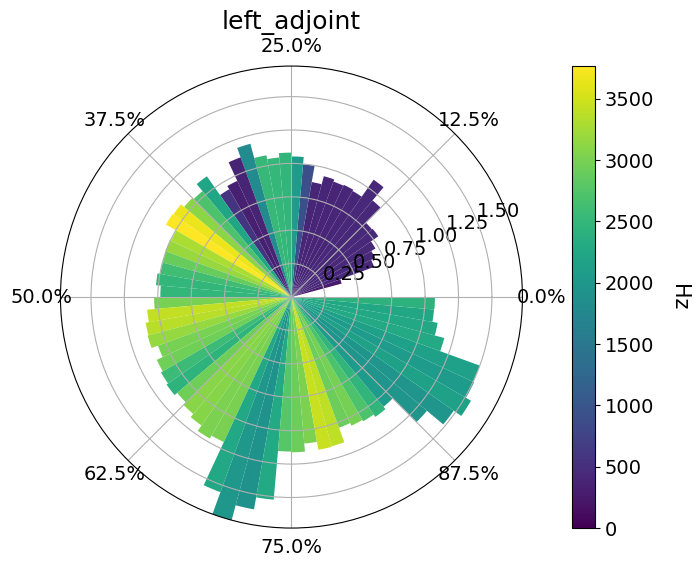

In [34]:
# FIGURE
os.chdir("../img/")
print(os.getcwd())
N = 72
width = 2 * np.pi / N
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = rosette_seg(val_oenv, N)  # oenv
slice_color = rosette_seg(val_centroid, N)  # oenv

# FIGURE
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="polar")
x_theta = np.radians(np.arange(0, 360, 5))
y = radii  # radius of the polar plot
z = slice_color  # mapped to colorbar
cmap = plt.get_cmap("viridis")
coll = colored_bar(x_theta, y, z, ax=ax, width=np.radians(5), cmap=cmap)
cbar = fig.colorbar(coll, pad=0.08)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel("Hz", rotation=270, fontsize=15, labelpad=25)
ax.set_yticks([0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
ax.tick_params(axis="both", which="major", labelsize=14)
plt.title(rev_performances[idx][0], fontsize=18)
plt.savefig(rev_performances[idx][0] + ".jpg")

In [35]:
# DATA for plotting
idx = 129
name = d[keys[idx]][0][0]
val_oenv = d[keys[idx]][0][1]
val_centroid = d[keys[idx]][4][1].reshape(-1)
name, len(val_oenv), len(val_centroid), rev_performances[idx], keys[idx], rev_performances[idx][0]  # sanity check

('oenv',
 25365,
 25365,
 ('YEE-KING',
  '2022-03-20 20:20',
  'https://archive.org/details/algorave',
  'https://archive.org/download/algorave-10-yee-king/f0aef102-5c5f-4207-a6ac-588080e10430-20-Mar-22-20-20-14.mp4',
  'South London',
  'lofi algorithmic sequencer and a load of synths followed by some crashing SuperCollider code :)'),
 '20-Mar-22-20-20',
 'YEE-KING')

/home/jovyan/work/img


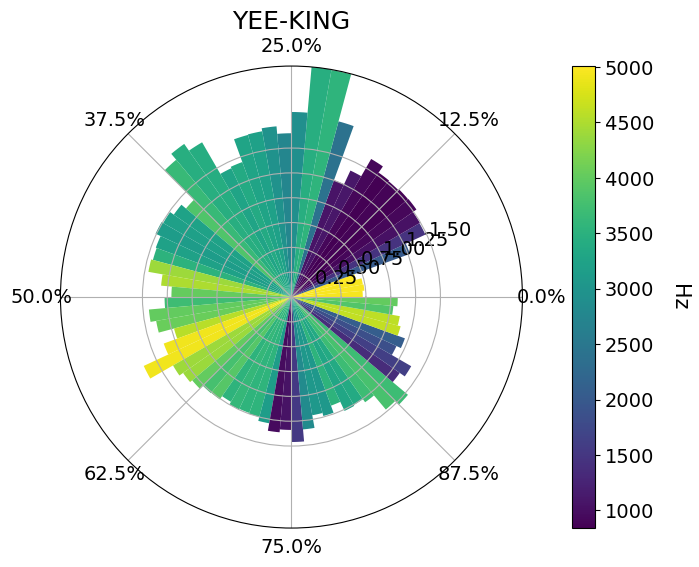

In [36]:
# FIGURE
os.chdir("../img/")
print(os.getcwd())
N = 72
width = 2 * np.pi / N
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = rosette_seg(val_oenv, N)  # oenv
slice_color = rosette_seg(val_centroid, N)  # oenv

# FIGURE
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="polar")
x_theta = np.radians(np.arange(0, 360, 5))
y = radii  # radius of the polar plot
z = slice_color  # mapped to colorbar
cmap = plt.get_cmap("viridis")
coll = colored_bar(x_theta, y, z, ax=ax, width=np.radians(5), cmap=cmap)
cbar = fig.colorbar(coll, pad=0.08)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel("Hz", rotation=270, fontsize=15, labelpad=25)
ax.set_yticks([0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
ax.tick_params(axis="both", which="major", labelsize=14)
plt.title(rev_performances[idx][0], fontsize=18)
plt.savefig(rev_performances[idx][0] + ".jpg")